<a href="https://colab.research.google.com/github/Reis25/Analytics/blob/master/Tisseract_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demetrios Reis 

processamento de imagens para desenvolvimento de texto

Objetivo: 

1- Plotar imagem;

2- Leitura de texto da imagem;

3- Passar do PDF para string (.txt);

4- selecionar palavras em um documento;

5- Dizer se no documento há CPF e qual;


In [ ]:
# Instalando requisitos
!pip3 install Pillow
!python -m pip install pypdf2
!pip3 install pytesseract
!pip3 install pdf2image
!sudo apt-get install tesseract-ocr
!apt-get install poppler-utils 


1. Exibindo texto através da imagem: 

In [ ]:
import os 
import cv2
import sys 
import re 
import pytesseract 
import numpy as np
import matplotlib.pyplot as plt
import PyPDF2

from pytesseract import Output
from PIL import Image 
from pdf2image import convert_from_path 

In [ ]:
# Mostrando imagem:
folder = 'phrase.jpg'

img = cv2.imread(folder, cv2.IMREAD_COLOR)

plt.title('Imagem Original')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# Leitura da imagem:
print(pytesseract.image_to_string( Image.open('phrase.jpg')))

2. Covertendo PDF para texto:

- Pela variedade de codificação de PDF'S essa técnica pode permitir perdas de informação. 

- Esse processamento é feito em duas etapas: 

  1- Primeiro, precisamos converter as páginas do PDF em imagens;

  2- Segundo, usar o OCR (reconhecimento óptico de caracteres) para ler o conteúdo da imagem e armazená-lo em um arquivo de texto.

Relatório disponível em: http://www.cvm.gov.br/legislacao/deliberacoes/deli0800/deli859.html


In [ ]:
# Arquivo
pdf_file = 'rel.pdf'

# Numero de paginas do pdf: 
pdf = PyPDF2.PdfFileReader(open(pdf_file,'rb'))

num_pages = pdf.getNumPages()

print("Numero de páginas do PDF: ",num_pages)

In [ ]:
# Primeira etapa -> convertendo pdf para imagens: 
pages = convert_from_path(pdf_file, 500)

# Relacao de unicidade entre imagem e pagina
image_counter = 1

# Renomeando automaticamente as páginas e salvando como imagem: 
for page in pages:
  filename = "page_"+str(image_counter)+".jpg"
  page.save(filename, 'JPEG')
  image_counter = image_counter +1


In [ ]:
# Segunda etapa -> Reconhecendo o texto das imagens usando o OCR
filelimit = image_counter-1 

outfile = "out_text.txt"

# Todo o conteúdo de todas as imagens é adicionado ao mesmo arquivo
f = open(outfile, "a") 

# Escrevendo os textos com sua identicacao de pagina:
for i in range(1, filelimit+1):
  filename = "page_"+str(i)+".jpg"
  text = str(((pytesseract.image_to_string(Image.open(filename)))))
  text = text.replace('-\n', '')
  f.write(text)

f.close    

In [ ]:
# subplot

In [ ]:
# Patche OpenCV
from google.colab.patches import cv2_imshow

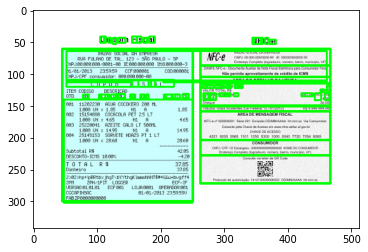

<Figure size 432x288 with 0 Axes>

In [ ]:
img = cv2.imread('Teste_notafiscal.jpg', cv2.IMREAD_UNCHANGED)


h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    

plt.imshow(img)
plt.show()
plt.savefig("box.png", dpi=500)

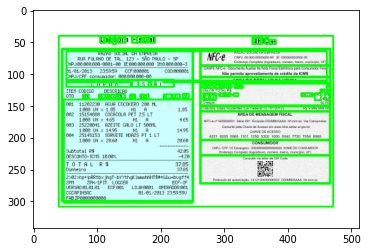

In [ ]:
img = cv2.imread(r"recu.jpg")
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^[0-9]*$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

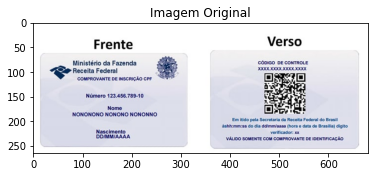

In [ ]:
# Buscando CPF:

# Exibindo: 
folder = 'novo_cpf.jpg'

img = cv2.imread(folder, cv2.IMREAD_COLOR)

plt.title('Imagem Original')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# Buscar string:
text =  pytesseract.image_to_string( Image.open('novo_cpf.jpg')) + ' 071.072.911-73'

# Printando String:
print(text)

Frente

Ministério da Fazenda
GH Feceita Federal
‘COMPROVANTE DE MSCRIGAO CPF
Namoro 123.486.7880
Nome

NONONONO NONONO NONONNO

Nascimento
BOIMMIAARA

Verso

‘cO01G0 DE CONTROLE
ODIO IKI

 

Em tid peta Secretaria da Racal Fedora do Brat
hic: do la damm/aaaa (nora e data do Brasil) gto
veeieador sx
\VAUu00 SOMENTE COM COMPROVANTE DEIDENTINCAGKO 071.072.911-73


O CPF reconhecido está errado, para busca o mesmo não está no formato correto e contém dígitos incorretos. 

In [ ]:
# Buscando CPF: 
cpf = re.findall(r'\d{3}\.\d{3}\.\d{3}-\d{2}', text)

cpftest = '000.111.222-33'

print(cpf)

['071.072.911-73']


In [ ]:
# Validando CPF:
def verifica_cpf(cpf: str) -> bool:
    # Verifica a formatação do CPF
    if not re.match(r'\d{3}\.\d{3}\.\d{3}-\d{2}', cpf):
        return False

    # Obtém apenas os números do CPF, ignorando pontuações
    numbers = [int(digit) for digit in cpf if digit.isdigit()]

    # Verifica se o CPF possui 11 números:
    if len(numbers) != 11:
        return False
    
    # Validação do primeiro dígito verificador:
    sum_of_products = sum(a*b for a, b in zip(numbers[0:9], range(10, 1, -1)))
    expected_digit = (sum_of_products * 10 % 11) % 10
    if numbers[9] != expected_digit:
        return False

    # Validação do segundo dígito verificador:
    sum_of_products = sum(a*b for a, b in zip(numbers[0:10], range(11, 1, -1)))
    expected_digit = (sum_of_products * 10 % 11) % 10
    if numbers[10] != expected_digit:
        return False

    return True

In [ ]:
verifica_cpf(cpf)

In [ ]:
verifica_cpf(cpftest)

False

Aplicando Processo de erosão e melhoramento de imagem 


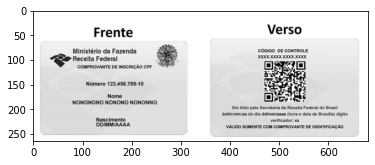

In [ ]:
img2 = cv2.imread('novo_cpf.jpg', 0)

kernel = np.ones((5,5), np.uint8)

img2_erosion = cv2.erode(img2, kernel, iterations =1)

plt.title('Imagem Após processo de erosao')

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.savefig("erosao.png")

In [ ]:
# extração de texto melhoramento de imagem
pytesseract.image_to_string(Image.open("erosao.png"))

'300\n\n350\n\n200\n250\n\n \n\n \n\n \n\n \n\noo 20000'